In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bostonhoustingmlnd/housing.csv


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset.
df = pd.read_csv('/kaggle/input/bostonhoustingmlnd/housing.csv')
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [8]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [9]:
#doing correlation 
correlation_matrix = df.corr()

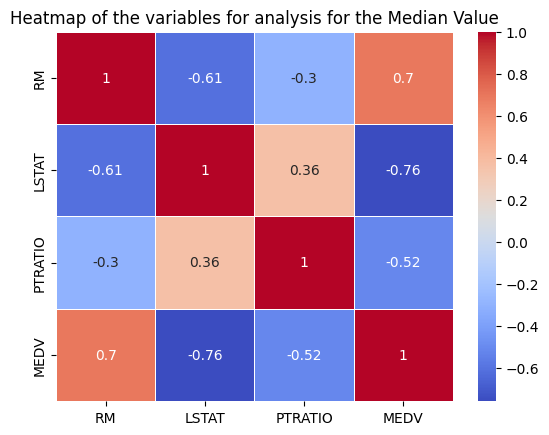

In [11]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of the variables for analysis for the Median Value')
plt.show()

In [16]:
X = df[['RM','LSTAT','PTRATIO']]
y = df['MEDV']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=42)

In [18]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

In [20]:
mse

6789025559.265892

In [22]:
R2

0.691093400309851

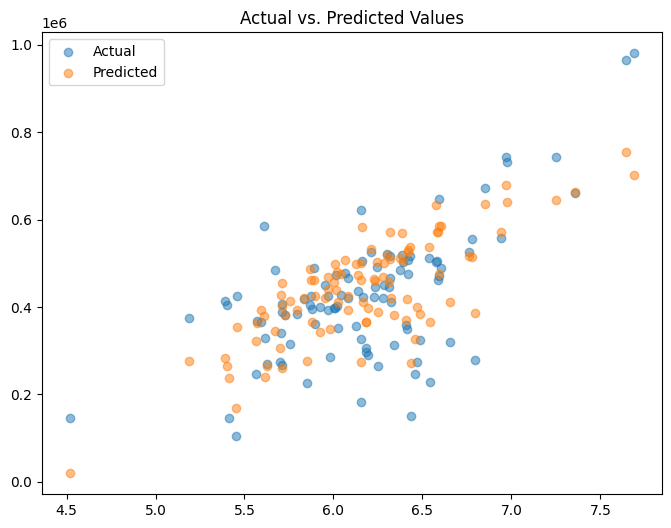

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test['RM'], y_test, alpha=0.5, label='Actual')
plt.scatter(X_test['RM'], y_pred, alpha=0.5, label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted Values')
plt.show()

In [30]:
gradient_model = GradientBoostingRegressor()
gradient_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [32]:
y_pred_g = gradient_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_g)
R2 = r2_score(y_test, y_pred_g)

In [33]:
mse,R2

(3352849389.849058, 0.8474424208231355)

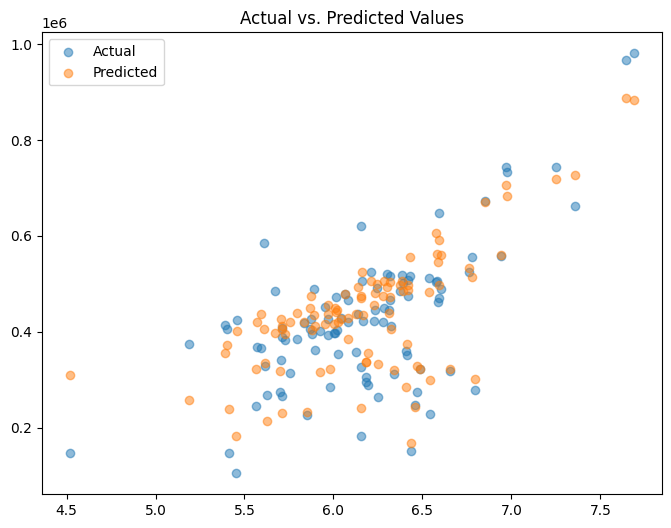

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test['RM'], y_test, alpha=0.5, label='Actual')
plt.scatter(X_test['RM'], y_pred_g, alpha=0.5, label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted Values')
plt.show()